# 🚀 PaddleOCR - Solution Anti-Segfault

**Problème résolu :** Segfault lors de `pipeline.predict()` dans Jupyter

**Solution :** Configuration spécifique de l'environnement PaddlePaddle


## ⚙️ ÉTAPE 1: Configuration Anti-Segfault (OBLIGATOIRE)

**⚠️ IMPORTANT : Exécutez cette cellule AVANT tout import PaddleOCR**


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import gc
import warnings
from PIL import Image

def configure_anti_segfault():
    """Configure l'environnement pour éviter les segfaults lors de predict()"""
    print("🔧 Configuration anti-segfault pour predict()...")
    
    # Désactiver TOUTES les optimisations CPU problématiques
    os.environ["FLAGS_use_mkldnn"] = "false"
    os.environ["FLAGS_use_gpu"] = "false"
    os.environ["CUDA_VISIBLE_DEVICES"] = ""
    
    # Un seul thread pour éviter les race conditions
    os.environ["OMP_NUM_THREADS"] = "1"
    os.environ["MKL_NUM_THREADS"] = "1"
    os.environ["NUMEXPR_NUM_THREADS"] = "1"
    
    # Mémoire conservative
    os.environ["FLAGS_eager_delete_tensor_gb"] = "0.0"
    os.environ["FLAGS_memory_fraction_of_eager_deletion"] = "0.0"
    os.environ["FLAGS_fraction_of_gpu_memory_to_use"] = "0.1"
    
    # Convolutions sécurisées
    os.environ["FLAGS_conv_workspace_size_limit"] = "32"
    os.environ["FLAGS_cudnn_exhaustive_search"] = "false"
    
    # Logs minimaux
    os.environ["GLOG_minloglevel"] = "3"
    
    print("✅ Configuration terminée")

# EXÉCUTER LA CONFIGURATION
configure_anti_segfault()


🔧 Configuration anti-segfault pour predict()...
✅ Configuration terminée


In [3]:
from src import main
from src import utils

📦 Import PaddleOCR...


Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /app/.paddlex/official_models.


✅ Import réussi
🔄 Initialisation du pipeline...


/usr/local/lib/python3.9/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in /app/.paddlex/official_models.
Creating model: ('PP-DocBlockLayout', None)
Using official model (PP-DocBlockLayout), the model files will be automatically downloaded and saved in /app/.paddlex/official_models.
Creating model: ('PP-DocLayout-L', None)
Using official model (PP-DocLayout-L), the model files will be automatically downloaded and saved in /app/.paddlex/official_models.
Creating model: ('PP-LCNet_x0_25_textline_ori', None)
Using official model (PP-LCNet_x0_25_textline_ori), the model files will be automatically downloaded and saved in /ap

✅ Pipeline initialisé avec succès


In [61]:
folder_path = "input/" # DANS LE DOSSIER NOTEBOOK ICI
image_name = "tableau1-1.png"
results, img = main.main_apply_pipeline(image_name,folder_path)

🔄 Prédiction sécurisée: input/tableau1-1.png
📏 Image redimensionnée: (724, 1024)
🧠 Exécution du modèle...
✅ Prédiction réussie !
calculé en  44.95480728149414 secondes

✅ Traitement terminé. Résultats enregistrés dans le dossier 'output/'
📷 Aperçu de la mise en page détectée : output/layout_vis.jpg
📋 Markdown généré : output/result.md



In [322]:
rec_boxes

[[184, 147, 286, 157],
 [398, 139, 447, 150],
 [341, 153, 377, 168],
 [395, 154, 451, 168],
 [472, 153, 500, 168],
 [519, 145, 577, 159],
 [143, 170, 245, 183],
 [143, 186, 245, 199],
 [143, 202, 257, 215],
 [143, 218, 242, 231],
 [143, 234, 222, 247],
 [142, 250, 238, 263],
 [143, 266, 250, 279],
 [143, 282, 403, 295],
 [143, 299, 206, 310],
 [304, 314, 454, 327],
 [143, 330, 359, 343],
 [143, 346, 279, 359],
 [142, 361, 451, 374],
 [141, 370, 192, 386],
 [144, 388, 393, 401],
 [142, 403, 281, 417],
 [489, 403, 519, 418],
 [552, 403, 582, 418],
 [144, 420, 297, 433],
 [553, 419, 582, 434],
 [143, 436, 235, 449],
 [145, 453, 214, 464],
 [258, 477, 274, 489],
 [329, 473, 452, 486],
 [259, 487, 322, 498],
 [143, 500, 238, 513],
 [328, 492, 376.1429748535156, 507],
 [376.1429748535156, 492, 376.25537109375, 507],
 [376.25537109375, 492, 430, 507],
 [257, 509, 432, 522],
 [257, 523, 415, 536],
 [256, 533, 302, 549],
 [141, 547, 207, 563],
 [304, 569, 452, 579],
 [490, 566, 519, 581],
 [551

🔧 Extension : 0 cellules avec texte préservées, 152 cellules vides étendues


/app/src/utils_new.py:1202: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


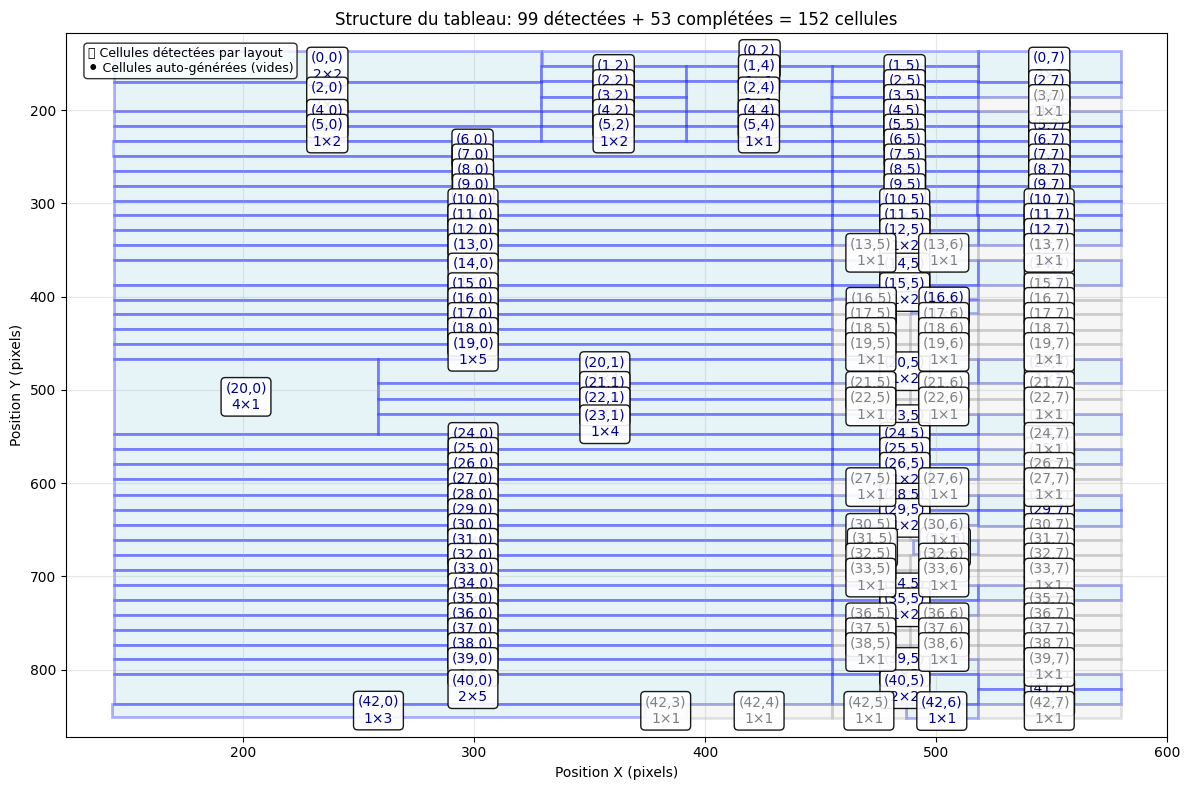

🧹 Nettoyage de la structure APRÈS assignment des textes...
🔄 Fusion de 92 cellules vides (préservation de 60 cellules avec texte)
✅ Résultat : 16 cellules vides après fusion
🔄 Correction automatique des chevauchements...
🔄 Correction automatique des chevauchements (récursive)...
  🔄 Itération 1/5
  📊 2 chevauchements détectés à corriger
    🔧 Correction PARTIAL: cellules #38 et #72
    ✅ Cellule vide #72 réduite du côté left pour éviter le chevauchement avec #38
    🔧 Correction PARTIAL: cellules #19 et #67
    ✅ Cellule vide #67 réduite du côté left pour éviter le chevauchement avec #19
  ✅ 2 corrections appliquées dans cette itération
  🔄 Itération 2/5
  📊 2 chevauchements détectés à corriger
    🔧 Correction INCLUSION: cellules #19 et #67
    ✅ Cellule #67 absorbée par #19
    🔧 Correction INCLUSION: cellules #38 et #72
    ✅ Cellule #72 absorbée par #38
    🗑️  2 cellules supprimées après fusion
    🔄 Recalcul des positions de grille...
  ✅ 2 corrections appliquées dans cette itéra

/app/src/utils_new.py:1681: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


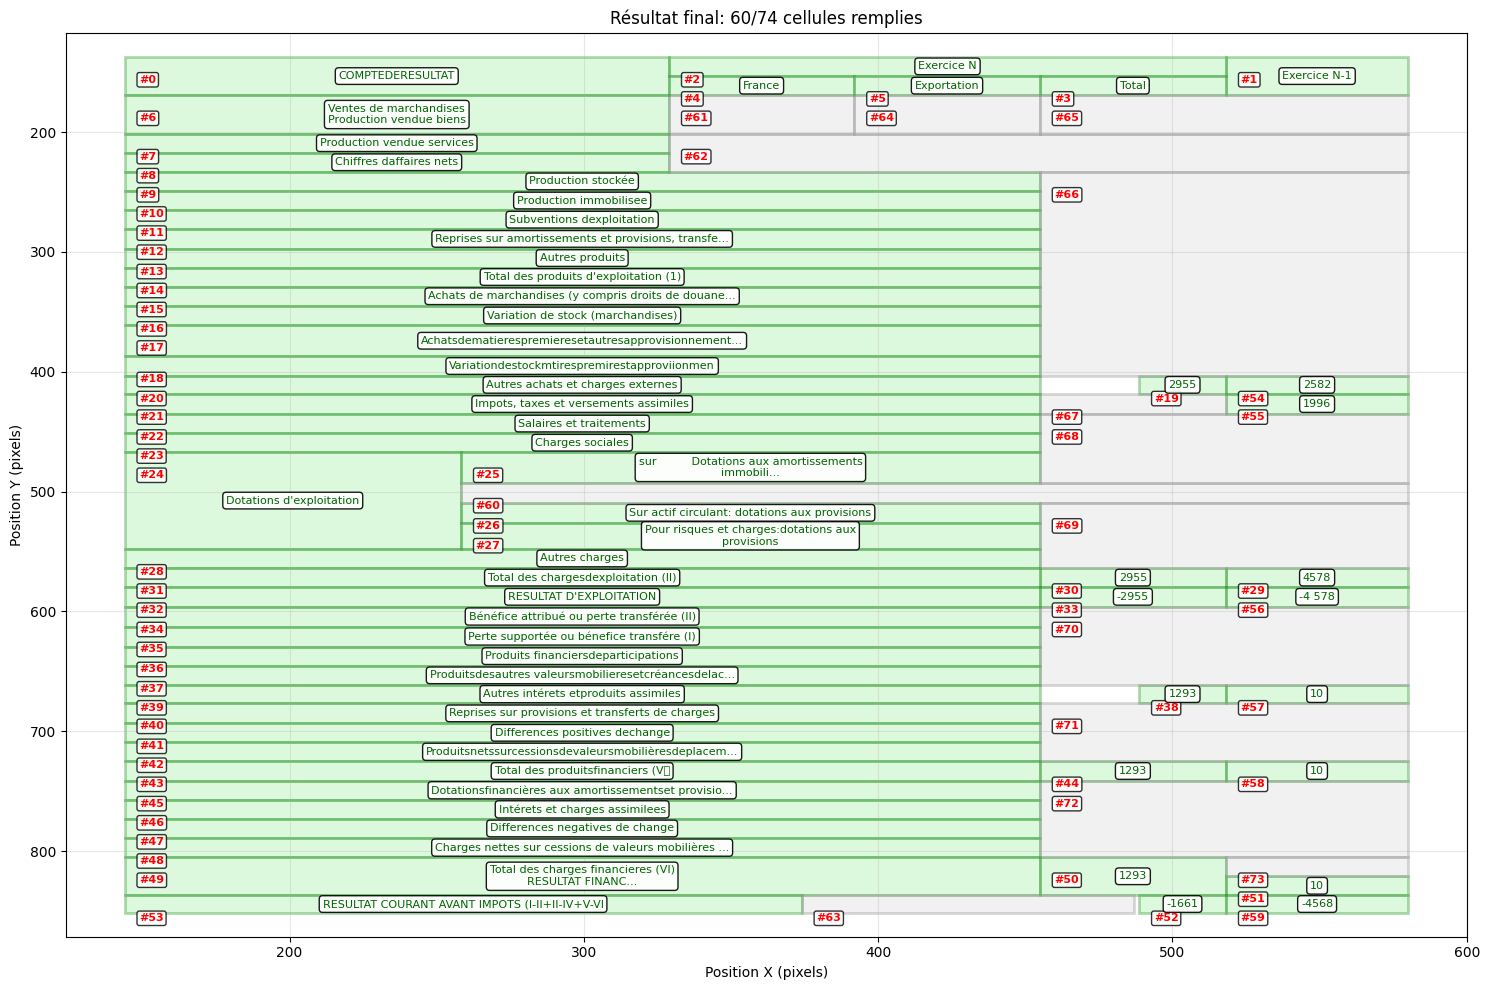

✅ Tableau HTML sauvegardé dans output/tableau2-1_png/tableau.html
# Mon Tableau

| Col 1 | Col 2 | Col 3 | Col 4 | Col 5 | Col 6 | Col 7 | Col 8 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| COMPTEDERESULTAT `[2×2]` |  | Exercice N `[1×5]` |  |  |  |  | Exercice N-1 `[2×1]` |
|  |  | France `[1×2]` |  | Exportation | Total `[1×2]` |  |  |
| Ventes de marchandises
Production vendue biens `[1×2]` |  |  `[1×2]` |  |   |  `[1×3]` |  |  |
| Production vendue services `[1×2]` |  |  `[2×6]` |  |  |  |  |  |
| Chiffres daffaires nets `[1×2]` |  |  |  |  |  |  |  |
| Production stockée `[1×5]` |  |  |  |  |  `[10×3]` |  |  |
| Production immobilisee `[1×5]` |  |  |  |  |  |  |  |
| Subventions dexploitation `[1×5]` |  |  |  |  |  |  |  |
| Reprises sur amortissements et provisions, transferts de charges `[1×5]` |  |  |  |  |  |  |  |
| Autres produits `[1×5]` |  |  |  |  |  |  |  |
| Total des produits d'exploitation \(1\) `[1×5]` |  |  |  |  |  |  |  |
| Achats de marchandises \(y comp

In [317]:
import src.utils_new as u_new
image_name = "tableau2-1.png"#
#image_name = "bilan_passif_audit-1_png"
#image_name = "tableau_compte_resultat_ocr-1.png"

import json
json_path = "output/"+  image_name.split('/')[-1].replace('.','_')  +"/safe_input_res.json"
with open(json_path, "r", encoding="utf-8") as f:
    json_res = json.load(f)
    
layout_boxes = json_res['table_res_list'][0]['cell_box_list']
rec_texts = json_res['table_res_list'][0]['table_ocr_pred']['rec_texts']
rec_boxes = json_res['table_res_list'][0]['table_ocr_pred']['rec_boxes']


# Charger les données
layout_boxes, rec_boxes, rec_texts = u_new.load_paddleocr_data(json_path)
# 1. Extraire la structure (sans nettoyage)
table_structure = u_new.extract_table_structure(
    layout_boxes, 
    fill_empty_cells=True,
    extend_cells=True
)
u_new.plot_table_structure(table_structure)

# 2. Assigner les textes OCR ET nettoyer (dans le bon ordre)
filled_structure = u_new.assign_ocr_to_structure(
    table_structure, rec_boxes, rec_texts, 
    force_assignment=True,
    clean_structure=True,  # ✅ Maintenant APRÈS l'assignment
    auto_correct_overlaps = True,
    smart_spacing = True
)

u_new.plot_final_result( filled_structure)

html_output = u_new.export_to_html(filled_structure, "Mon Tableau")
display(HTML(html_output))

# 6. Sauvegarder le HTML
u_new.save_html_to_file(html_output, "output/"+  image_name.split('/')[-1].replace('.','_')  +"/tableau.html")

# 7. Export Markdown
markdown_output = u_new.export_to_markdown(filled_structure, "Mon Tableau")
print(markdown_output)

In [308]:
n = 9
for el in filled_structure[n:n+1]:
    print(el.x1)
    print(el.y1)
    print(el.x2)
    print(el.y2)
    print('row start', el.row_start)
    print('col start', el.col_start)
    print('row span', el.row_span)
    print("col span", el.col_span)
    print(el.texts)
    print(el.final_text)
    print(el.is_auto_filled)
    print('')

417.03931592858356
195.59894561767578
718.7634887695312
255.9311269124349
row start 2
col start 3
row span 2
col span 4
[{'text': '113 547', 'box': [452, 200, 495, 214], 'center': (473.5, 207.0)}, {'text': '9734 263', 'box': [441, 214, 497, 231], 'center': (469.0, 222.5)}, {'text': '.', 'box': [435, 253, 440, 259], 'center': (437.5, 256.0)}, {'text': '9847809', 'box': [440, 249, 496, 263], 'center': (468.0, 256.0)}]
113 547
9734 263
. 9847809
False



In [263]:
3+1+1+1+1


7